In [1]:
# We start by importing some modules:
import uproot  # reads the data in the binary .root files
import awkward as ak  # provides "ragged" arrays for n-dimensional arrays with variables lengths
import vector  # defines classes for manipulating, e.g. four-vectors
import boost_histogram as bh # for filling hisograms
import matplotlib.pyplot as plt  # for visualising histograms and other plots

In [2]:
# Open a root file. Each file contains a set of objects, in this case we want to open a "TTree" object
# called "Events". A TTree is like a table of data, where each row corresponds to the data of a single
# proton-proton collision event, and each column (often called a "branch") contains a different piece
# of information about that event.
events = uproot.open("SMHiggsToZZTo4L.root:Events")
# We can take a look at the layout of the data in the TTree
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
PV_npvs              | int32_t                  | AsDtype('>i4')
PV_x                 | float                    | AsDtype('>f4')
PV_y                 | float                    | AsDtype('>f4')
PV_z                 | float                    | AsDtype('>f4')
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge       

In [3]:
# Now let's read the data from the file
branches = events.arrays()

# We can look at the data for a single branch, the number of reconstructed muons in each event
print(branches["nMuon"])

[3, 0, 0, 7, 0, 2, 1, 0, 0, 0, 1, 2, 0, ..., 0, 0, 0, 2, 2, 2, 0, 2, 2, 4, 0, 0]


In [4]:
# We see the first event had three muons, the second event had zero muons, etc.
# We can also look at the properties of those muons, for example their transverse momenta:
print(branches["Muon_pt"])

[[63, 38.1, 4.05], [], [], [54.3, ...], ..., [4.32, 4.36, 5.63, 4.75], [], []]


We can see the three muons in the first event have transverse momenta of 63, 38.1 and 4.05 GeV, respectively.
This is an example of a "jagged array" - a 2D array where there's a different number of entries in each row (reflecting the fact that there is a variable number of muons reconstructed in each event).

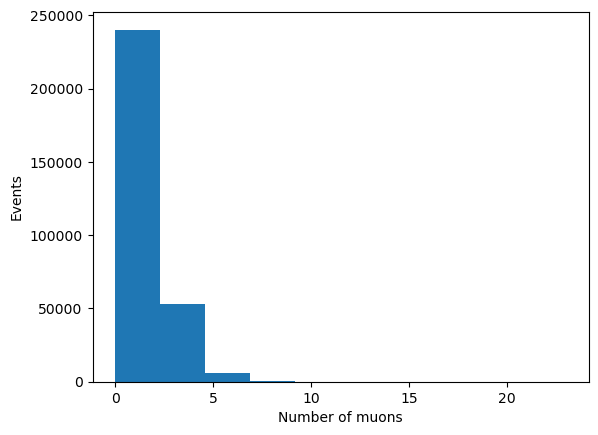

In [11]:
plt.hist(branches["nMuon"])
plt.xlabel('Number of muons')
plt.ylabel('Events')
plt.show()

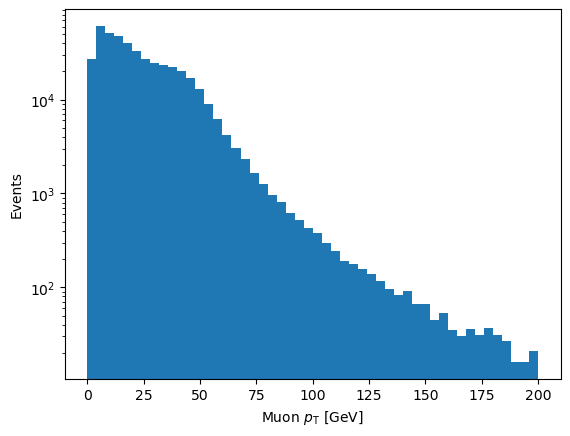

In [17]:
# Some distributions will look better if we use a logarithmic y-axis scale:
plt.hist(ak.flatten(branches["Muon_pt"]), bins=50, range=(0,200))
# Here we have to first "flatten" the jagged Muon_pt array, i.e. transform an array like:
# [ [1, 2], [3], [4, 5, 6] ] into [1, 2, 3, 4, 5, 6]
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Events')
plt.yscale('log')
plt.show()


We will find it easier to interact with the muons by treating them as four-momenta. You might be used to seeing four-momenta vectors specified as $(E, p_{x}, p_{y}, p_{z})$. In our TTree we see that we have branches `Muon_pt`, `Muon_eta`, `Muon_phi` and `Muon_mass`. In fact the two sets of variables contain indentical information, the latter are just more convenient from how we typically perform analysis.

We can make use of the `vector` package to group these four variables into four-momentum objects that give us a lot of useful functions, and the ability to do things like add two vectors together.

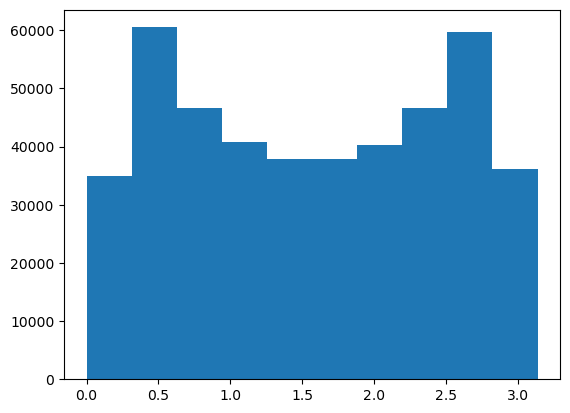

In [24]:
muon_p4 = vector.zip({'pt': branches['Muon_pt'], 'eta': branches['Muon_eta'], 'phi': branches['Muon_phi'], 'mass': branches['Muon_mass']})
plt.hist(ak.flatten(muon_p4.theta)) # the vector class will take care of calculating the theta angle as a function of the inputs
plt.show()

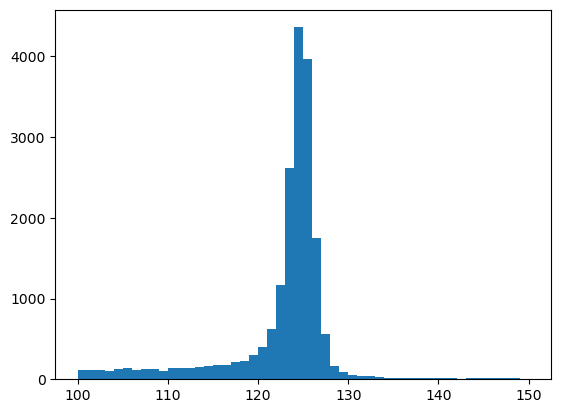

In [33]:
# We can also apply selections on the events - for 
four_muons_p4 = muon_p4[branches['nMuon'] == 4]
higgs_cand = four_muons_p4[:, 0] + four_muons_p4[:, 1] + four_muons_p4[:, 2] + four_muons_p4[:, 3]
plt.hist(higgs_cand.mass, bins=50, range=(100,150))
plt.show()